In [105]:
import numpy as np
import pandas as pd
import seaborn
import  matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df = pd.read_csv('Mall_Customers.csv')

In [107]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [108]:
df.rename(columns={'CustomerID':'Id', 'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, inplace=True)

In [109]:
df

,Id,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [110]:
df.shape

(200, 5)

In [111]:
df.isnull().values.any()

False

In [112]:
df.describe()

,Id,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


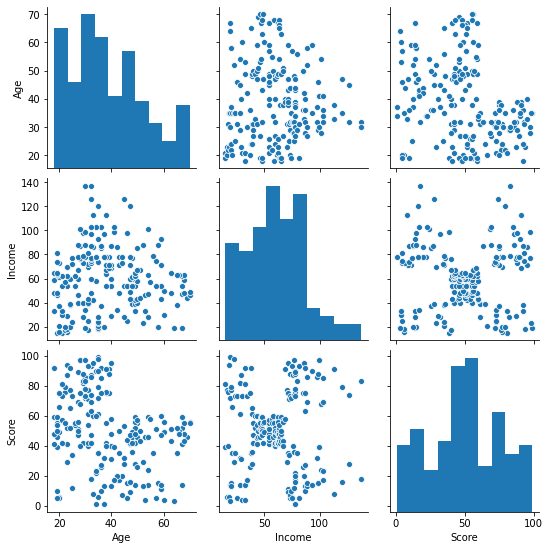

In [113]:
seaborn.pairplot(df[['Age','Income','Score']])

In [114]:
import sklearn.cluster as cluster

In [115]:
kmeans = cluster.KMeans(n_clusters=5)

In [116]:
kmeans = kmeans.fit(df[['Score','Income']])

In [117]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

In [118]:
df['Income_cluster'] = kmeans.labels_

In [119]:
df

,Id,Gender,Age,Income,Score,Income_cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,4


In [120]:
df['Income_cluster'].value_counts()

2    81
0    39
4    35
1    23
3    22
Name: Income_cluster, dtype: int64

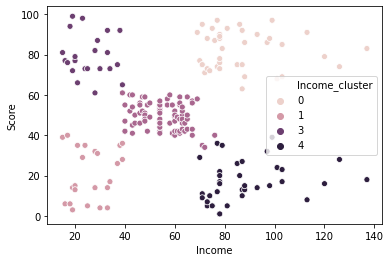

In [121]:
seaborn.scatterplot(x='Income', y='Score', hue='Income_cluster', data=df)

In [122]:
kmeans = cluster.KMeans(n_clusters=2)

In [123]:
kmeans = kmeans.fit(df[['Age','Score']])

In [124]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [125]:
df['Age_cluster'] = kmeans.labels_

In [126]:
df['Age_cluster'].value_counts()

1    115
0     85
Name: Age_cluster, dtype: int64

In [127]:
df

,Id,Gender,Age,Income,Score,Income_cluster,Age_cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,4,1
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,4,1


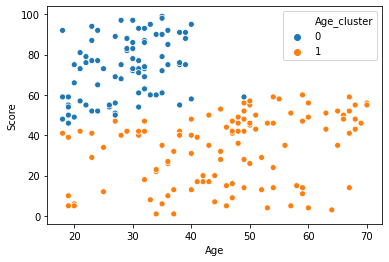

In [128]:
seaborn.scatterplot(x='Age', y='Score', hue='Age_cluster', data=df)

In [129]:
kmeans = cluster.KMeans(n_clusters=2)

In [130]:
kmeans = kmeans.fit(df[['Id','Score']])

In [131]:
kmeans.cluster_centers_

array([[ 50.5 ,  49.93],
       [150.5 ,  50.47]])

In [132]:
df['Id_cluster'] = kmeans.labels_

In [133]:
df['Id_cluster'].value_counts()

1    100
0    100
Name: Id_cluster, dtype: int64

In [134]:
df

,Id,Gender,Age,Income,Score,Income_cluster,Age_cluster,Id_cluster
0,1,Male,19,15,39,1,1,0
1,2,Male,21,15,81,3,0,0
2,3,Female,20,16,6,1,1,0
3,4,Female,23,16,77,3,0,0
4,5,Female,31,17,40,1,1,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,1
196,197,Female,45,126,28,4,1,1
197,198,Male,32,126,74,0,0,1
198,199,Male,32,137,18,4,1,1


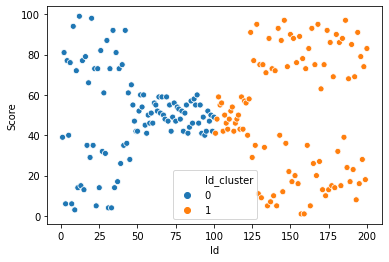

In [135]:
seaborn.scatterplot(x='Id', y='Score', hue='Id_cluster', data=df)

In [136]:
from sklearn.cluster import KMeans

In [137]:
k_range = range(1,12)
wcss = []

In [138]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Income','Score']])
    wcss.append(km.inertia_)

In [139]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37442.24745037571,
 30259.657207285458,
 25018.781613414074,
 21862.09267218289,
 19634.554629349972,
 17848.506274865496]

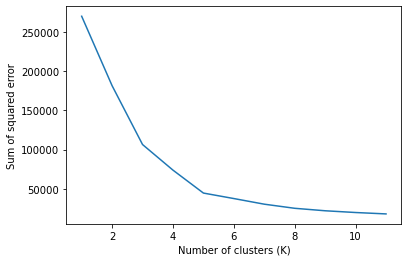

In [140]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)

In [141]:
k_range = range(1,12)
wcss = []

In [142]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Score']])
    wcss.append(km.inertia_)

In [143]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.848251581334,
 19576.013221355326,
 15514.193134351033,
 13024.101653416463,
 11506.189818580546,
 10276.802663080383,
 9503.80926461622]

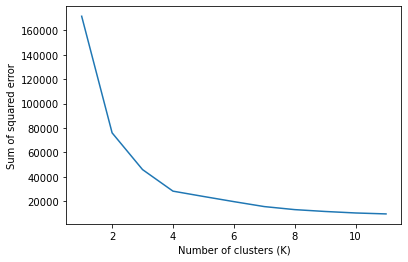

In [144]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)

In [145]:
k_range = range(1,12)
wcss = []

In [146]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Id','Score']])
    wcss.append(km.inertia_)

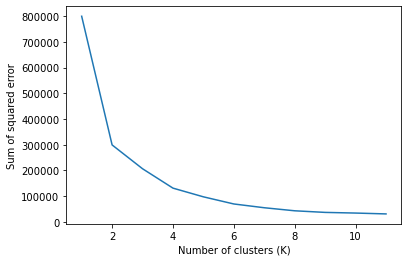

In [147]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)